In [1]:
# Installs and imports
!pip3 install nltk
!pip3 install scikit-learn
!pip3 install gensim
!pip install wordcloud
!pip install Document Similarity
import numpy as np
import pandas as pd
import nltk
import string
from nltk.corpus import stopwords
from collections import Counter
from sklearn.feature_extraction.text import TfidfVectorizer
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from gensim.models import Word2Vec
from DocumentSimilarity import DocumentSimilarity


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip

[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Created wheel for Document: filename=document-1.0-py3-none-any.whl size=8821 sha256=d5fbe5dc1483914b8b582b207d78920ee5b3e5169352a8de451e2e84eb9c89cd
  Stored in directory: c:\users\vineet\appdata\local\pip\cache\wheels\80\d3\45\16e328dbf8e4057db4344784bf7d3730e6711435da7737f5e0
Successfully built Document


ModuleNotFoundError: No module named 'DocumentSimilarity'

### Part 1: Quantitative Analysis of the Industry Sector

#### A: Industry Sector Selection and Data Filtering

##### A-1: Choose at least one industry sector that interests your group.

In [3]:
# Loading major_groups.csv file into a dataframe 
df_major_groups = pd.read_csv('major_groups.csv', index_col=0)

# Update Pandas setting to display the whole dataframe

# Reference: https://stackoverflow.com/questions/25351968/how-can-i-display-full-non-truncated-dataframe-information-in-html-when-conver
# Reference: https://stackoverflow.com/questions/66657047/showing-all-rows-and-columns-of-pandas-dataframe
pd.set_option('display.max_colwidth', None) 
pd.set_option('display.max_rows', None)

# Print the dataframe
# Action: make it beautiful. 
df_major_groups

,description
major_group,
1,Agricultural Production Crops
2,Agriculture production livestock and animal specialties
7,Agricultural Services
8,Forestry
9,Fishing hunting and trapping
10,Metal Mining
12,Coal Mining
13,Oil And Gas Extraction
14,"Mining And Quarrying Of Nonmetallic Minerals, Except Fuels"


In [5]:
# After print out the industry related, our group is focused on the transportation industry.
# We only focus on transportation services, not transportation equipments
# We filter the descriptions to find industries containing the keyword "Transportation" and not containing the keyword "Equipment"
# Case not sensitive. 

# Filter the selected industries
# Reference: https://stackoverflow.com/questions/17097643/search-for-does-not-contain-on-a-dataframe-in-pandas
df_filtered_major_groups = df_major_groups[df_major_groups['description'].str.contains('transportation', case=False, na=False) & ~df_major_groups['description'].str.contains('Equipment', case=False, na=False)]

# Convert industry index to strings in order to use startwith function to filter the firms belonging to the transportation sector
# Reference: https://stackoverflow.com/questions/17950374/converting-a-column-within-pandas-dataframe-from-int-to-string
# Reference: https://pandas.pydata.org/docs/reference/api/pandas.Series.str.startswith.html
industry_index = df_filtered_major_groups.index.astype(str).tolist()

df_filtered_major_groups

,description
major_group,
40,Railroad Transportation
41,Local And Suburban Transit And Interurban Highway Passenger Transportation
42,Motor Freight Transportation And Warehousing
44,Water Transportation
45,Transportation By Air
47,Transportation Services


##### A-2: filter the data in "data/public_firms.csv" to only include the firms belonging to the industry sector(s) our group have selected.(Transportation)

In [7]:
# Loading major_groups.csv file into a dataframe 
df_public_firms = pd.read_csv('public_firms.csv', index_col=0)
print(df_public_firms.head())

# Convert the sic column in public firms dataframe into strings in order to use startwith function
df_public_firms['sic'] = df_public_firms['sic'].astype(str)

# Filter public frims dataframe where sic column starts with all the industry index 
# I use ChatGPT to inspire me with the idea of tuple argument but not directly copy-paste the code. 
# with the prompt: I have a list ('industry_index'), I'd like to go through the column ('sic') 
# and filter a new dataframe with every rows starts with the elements in 'industry_index'. 
# I still want to use startwith function. Which argument can I choose or I should choose other functions? 

# Reference: https://pandas.pydata.org/docs/reference/api/pandas.Series.str.startswith.html
# Reference: http://xion.io/post/code/python-startswith-tuple.html
df_filtered_public_firms = df_public_firms[df_public_firms['sic'].str.startswith(tuple(industry_index))]

       fyear location      conm     ipodate   sic  prcc_c      ch      ni  \
gvkey                                                                       
1004    1994      USA  AAR CORP  1988/01/01  5080  13.375  22.487  10.463   
1004    1995      USA  AAR CORP  1988/01/01  5080  22.000  33.606  16.012   
1004    1996      USA  AAR CORP  1988/01/01  5080  30.250  51.705  23.025   
1004    1997      USA  AAR CORP  1988/01/01  5080  38.750  17.222  35.657   
1004    1998      USA  AAR CORP  1988/01/01  5080  23.875   8.250  41.671   

         asset     sale       roa  
gvkey                              
1004   425.814  451.395  0.024572  
1004   437.846  504.990  0.036570  
1004   529.584  589.328  0.043478  
1004   670.559  782.123  0.053175  
1004   726.630  918.036  0.057348  


##### A-3: Answer the questions:
##### a. How many unique firm-year ("fyear") observations are there in the filtered dataset?

In [9]:
# Unique firm-year ('fyear') obseversation numbers
# Reference: https://stackoverflow.com/questions/45759966/counting-unique-values-in-a-column-in-pandas-dataframe-like-in-qlik
unique_fyear = df_filtered_public_firms['fyear'].nunique()
print("There are " + str(unique_fyear) + " unique firm-year observations in the filtered dataset")

There are 27 unique firm-year observations in the filtered dataset


##### b. How many unique firms are there in the filtered dataset?

In [11]:
# Unique firms in the filtered dataset
# Action - different industry group? 
unique_firms = df_filtered_public_firms['conm'].nunique()
print("There are " + str(unique_firms) + " unique firm observations in the filtered dataset") 

There are 478 unique firm observations in the filtered dataset


##### c. How many firms in the filtered dataset have records over all 27 years (1994-2020)

In [13]:
# choose only the company name and opteration years in public firms dataframe
# Remove the duplicates (if any): there may be duplicate information 
# (e.g having the same company name and operation year but have different in other columns)
# Reference: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop_duplicates.html
df_distinct_public_firms = df_filtered_public_firms[['conm', 'fyear']].drop_duplicates()

# Count the occurrences of each company 
# Reference: https://pandas.pydata.org/docs/reference/api/pandas.Series.value_counts.html
company_record = df_distinct_public_firms['conm'].value_counts()

# Filter companies who have record over all the years
# Reference: I use chatGPT with the prompt: 
# I got the result from: company_record = df_distinct_public_firms['conm'].value_counts() 
# and I would like to filter companies who have record over all the years (using unique_fyear)
companies_operate_over_all_years = company_record[company_record == unique_fyear].index

# Sum up the number of companies with records over all the years
# Reference: I ask chatGPT to optimize the code above to sum the company occurance
num_companies_operate_over_all_years = df_distinct_public_firms['conm'].value_counts().eq(unique_fyear).sum()
print("There are "+ str(num_companies_operate_over_all_years) + " companies have records over all years in the record.")

# Print the company names
# Reference: I use chatGPT to optimize my code: 
# for company in companies_operate_over_all_years:
#     print(company)
print("The companies are:")
print('\n'.join(companies_operate_over_all_years))

There are 6 companies have records over all years in the record.
The companies are:
TEEKAY CORP
AIR T INC
INTL CONSOL AIRLINES GROUP
SKYWEST INC
TIDEWATER INC
FEDEX CORP


#### B: Preliminary Analysis;

##### B-1: What are the top 10 firms with the highest stock price (column "prcc_c") in the year 2020?

In [15]:
# Filter the firms operates in the year 2020, then sort the highest number based on prcc_c column
# Remove all the duplicate adn print only top 10 results
# Reference: After I optimize the output, the index doesn't look right. ChatGPT suggests that Reset index to start from 0
# The issue with the index is because you’re using the existing DataFrame index in your output. 
# To fix this, use the enumerate function directly on the iterrows or use reset_index() to ensure that the index starts from 0.
df_year2020_public_firms_high_stock_price = df_public_firms[df_public_firms['fyear'] == 2020].sort_values('prcc_c',ascending = False).drop_duplicates(subset='conm').head(10).reset_index(drop=True)  

# Print the result
print("The top 10 firms with the highest stock price in the year 2020 are:")
# Reference: I use chatGPT to optimize my code below for better output format
# for company in df_year2020_public_firms_high_stock_price['conm']:
#    print(company)

# Use list comprehension to format the company names and join them into a single string
print('\n'.join(
    f"{i+1}. {row['conm']} - Stock Price: ${row['prcc_c']:.2f}"
    for i, row in df_year2020_public_firms_high_stock_price.iterrows()
))

The top 10 firms with the highest stock price in the year 2020 are:
1. LICT CORP - Stock Price: $17800.00
2. FARMERS & MERCHANTS BANK/CA - Stock Price: $6625.00
3. CARDINAL ETHANOL LLC - Stock Price: $5127.00
4. NVR INC - Stock Price: $4079.86
5. SOUTHERN BANCSHARES NC INC - Stock Price: $3899.80
6. AMAZON.COM INC - Stock Price: $3256.93
7. SEABOARD CORP - Stock Price: $3031.00
8. CABLE ONE INC - Stock Price: $2227.72
9. BOOKING HOLDINGS INC - Stock Price: $2227.27
10. ADIRONDACK TRUST CO - Stock Price: $1825.00


##### B-2: What are the top 10 firms with the highest sales (column "sale") in the entire history of thedataset?

In [17]:
# Sort the highest sales
# Remove all the duplicate companies (for some giant company like walmart, it have several sales records over the years
# While we only need one occurance and print top 10 results.
df_top_10 = df_public_firms.sort_values('sale', ascending=False).drop_duplicates(subset=['conm']).reset_index(drop=True).head(10)

# Reference: I use chatGPT to optimize for better output format
# Print the result
print("The top 10 firms with the highest sales over the years are:")
for i, row in df_top_10.iterrows():
    print(f"{i+1}. {row['conm']}")

The top 10 firms with the highest sales over the years are:
1. WALMART INC
2. CHINA PETROLEUM & CHEM CORP
3. ROYAL DUTCH SHELL PLC
4. EXXON MOBIL CORP
5. AMAZON.COM INC
6. BP PLC
7. PETROCHINA CO LTD
8. BERKSHIRE HATHAWAY
9. VOLKSWAGEN AG
10. TOYOTA MOTOR CORP


##### B-3: how many firms are there in each location? Please list the top 10 locations. (column "location") 

In [19]:
# choose only the company name and opteration years in public firms dataframe, remove the duplicates (if any)

# drop duplicates for the companies operater for several years
df_unique_locations = df_public_firms.drop_duplicates(subset=['conm', 'location'])
df_top_10_locations = df_unique_locations['location'].value_counts().head(10)

# Reference: I use chatGPT to optimize for better output format
print("\nTop 10 locations by firm count:")
print('\n'.join(
    f"{i+1}. {location}: {count} firms"
    for i, (location, count) in enumerate(df_top_10_locations.items())
))


Top 10 locations by firm count:
1. USA: 19006 firms
2. CAN: 700 firms
3. CHN: 578 firms
4. GBR: 285 firms
5. ISR: 223 firms
6. HKG: 144 firms
7. BMU: 116 firms
8. AUS: 74 firms
9. NLD: 73 firms
10. IRL: 71 firms


##### B-4: Create a line chart to show the average stock price (column "prcc_c") in the selected sector(s) across the years. If you have selected multiple sectors, draw multiple lines to show them separately

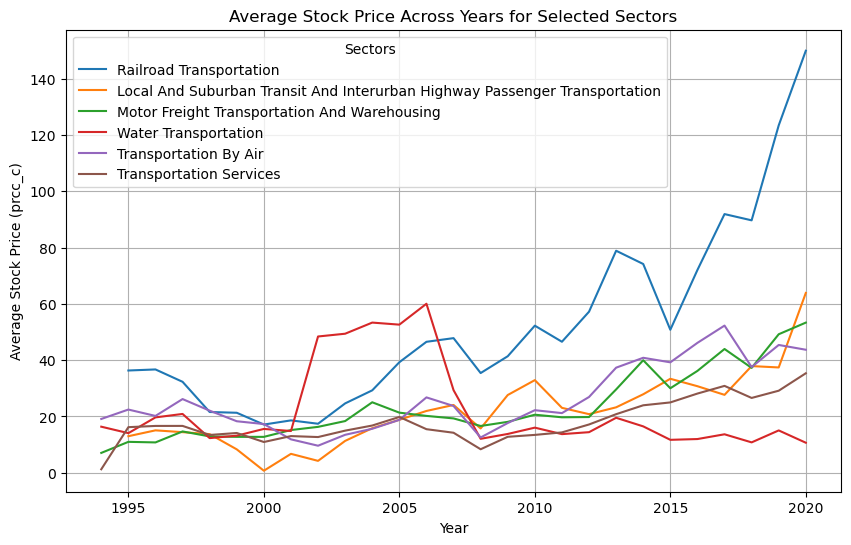

In [21]:
# Initialize a plot
plt.figure(figsize=(10, 6))

# Create a dictionary that maps major_group numbers to their descriptions
# Reference: suggestion from chatGPT (stated below)
major_group_dict = df_major_groups['description'].to_dict()

# Loop the industries selected
for i in industry_index :
    # Find the selected sector who is in the targeted industry (the sector startswith the industry index)
    df_sector = df_filtered_public_firms[df_filtered_public_firms['sic'].str.startswith(i)]

    # Group by year and calculate the average stock price (prcc_c)
    # Reference: I asked chatGPT with the prompt: 
    # "I would like to create a line chart to show the trend of average stock price (from column "prcc_c") over the years (from column "fyear")
    df_avg = df_sector.groupby('fyear')['prcc_c'].mean().reset_index()

    # Referenece: I asked chatGPT with the prompt:
    # "I want to show the label names (from major_groups dataframe) instead of SIC numbers"
    # Get the sector name from major_groups
    sector_name = major_group_dict.get(int(i), f'SIC {i}')
    
    # Plot the average stock price for the current sector
    plt.plot(df_avg['fyear'], df_avg['prcc_c'], label=sector_name)
    
# Add labels and legend
plt.xlabel('Year')
plt.ylabel('Average Stock Price (prcc_c)')
plt.title('Average Stock Price Across Years for Selected Sectors')
plt.legend(title='Sectors')
plt.grid(True)

# Show the plot
plt.show()

##### B-5: Which firm was affected the most by the 2008 Financial Crisis, as measured by the percentage drop in stock price from 2007 to 2008?

In [23]:
# find having occurance in 2007 but not 2008
# Reference: I use chatGPT to generate the initial code based on my comments below.

# Filter the companies operating in 2007 and get their stock price, stock in a new dataframe
df_2007 = df_public_firms[df_public_firms['fyear'] == 2007][['conm', 'prcc_c']].rename(columns={'prcc_c': 'prcc_c_2007'})

# Filter the companies operating in 2008 and get their stock price, stock in a new dataframe
df_2008 = df_public_firms[df_public_firms['fyear'] == 2008][['conm', 'prcc_c']].rename(columns={'prcc_c': 'prcc_c_2008'})

# Use inner join for the 2 dataframes to ensure we have data for both years
df_combined = pd.merge(df_2007, df_2008, on = 'conm', how = 'inner')

# Calculate the drop percentage rate and save in a new column
df_combined['pct_drop'] = ((df_combined['prcc_c_2007'] - df_combined['prcc_c_2008']) / df_combined['prcc_c_2007']) * 100

# Sort and find the company with the highest drop
most_affected_company = df_combined.sort_values(by='pct_drop', ascending=False).iloc[0]

# Print the most affected company
print(f"The company most affected by the 2008 Financial Crisis is {most_affected_company['conm']} with a drop of {most_affected_company['pct_drop']:.2f}% in stock price.")

The company most affected by the 2008 Financial Crisis is INCA DESIGNS INC with a drop of 99.98% in stock price.


##### B-6: Plot the average Return on Assets (ROA) for the firms located in the “USA” across the years. ROA is calculated as ni/asset

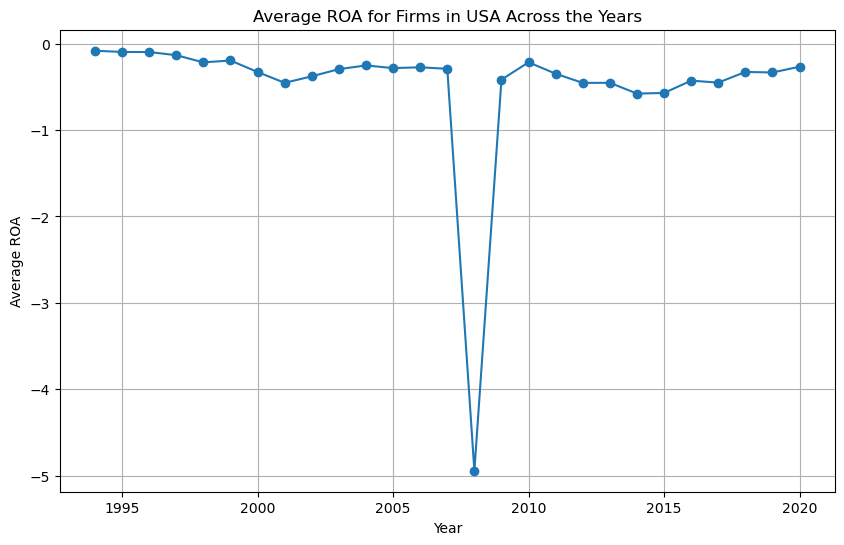

In [25]:
# Filter the firms located in the USA
# Reference: I didn't add .copy() before but got a warning "A value is trying to be set on a copy of a slice from a Dataframe"
# I asked chatGPT to optimize and fix the warning
df_usa = df_public_firms[df_public_firms['location'] == 'USA'].copy()

# Calculate ROA, check if df_usa['asset'] == 0 just in case 
# Reference: I asked chatGPT how to add a constraint if df_usa['asset'] != 0
df_usa.loc[:, 'roa'] = df_usa['ni'] / df_usa['asset'].replace({0: pd.NA})

# Group by year, calculate the average ROA (ni/asset)
df_usa_avg_roa = df_usa.groupby('fyear')['roa'].mean().reset_index()
df_usa_avg_roa.columns = ['fyear', 'avg_roa']

# Plot
plt.figure(figsize=(10, 6))
plt.plot(df_usa_avg_roa['fyear'], df_usa_avg_roa['avg_roa'], marker='o')
plt.xlabel('Year')
plt.ylabel('Average ROA')
plt.title('Average ROA for Firms in USA Across the Years')
plt.grid(True)
plt.show()

### Part 2: Text Analysis on the Industry Sector

#### C: Text cleaning

##### C-1: Load the dataset 2020_10K_item1_full.csv as a DataFrame and create a new column containing the cleaned text for each “item_1” content. Convert all words into lowercase.

In [27]:
# Load the dataset as a dataframe
df_2020_10K_item1_full = pd.read_csv('2020_10K_item1_full.csv', index_col=0, encoding = 'utf-8')

# Convert into lowercase
df_2020_10K_item1_full['clean_text'] = df_2020_10K_item1_full['item_1_text'].str.lower()

##### C-2: Remove punctuations.

In [29]:
# Remove punctuations
translator = str.maketrans('', '', string.punctuation)
df_2020_10K_item1_full['clean_text'] = df_2020_10K_item1_full['clean_text'].str.translate(translator)

##### C-3: Remove stop words based on the list of English stop words in NLTK

In [31]:
import string

translator = str.maketrans('', '', string.punctuation)
sw = stopwords.words('english')

def clean_text(text):
    ''' This function takes a string as input and 
        returns a cleaned version of the string
        Specifically, it makes the string into lower case and remove punctuations
    '''
    text_lower = text.lower() # make it lowercase
    text_no_punctuation = text_lower.translate(translator) # remove punctuation  
    clean_words = [w for w in text_no_punctuation.split() if w not in sw] # remove stopwords
    return ' '.join(clean_words)
   
df_2020_10K_item1_full['clean_text'] = df_2020_10K_item1_full['clean_text'].apply(clean_text)


print(df_2020_10K_item1_full[['clean_text']].head())

#### D: Keyword Analysis

##### D-1: Create a new DataFrame that includes only firms in Transportation sector. Ensure that you merge the 10-K data with the previous "public_firm.csv" data using an inner join

In [33]:
# merge two dataframes with inner join
# The two dataframes do not share same column name, define left_on/right_on argument to merge
# Reference: https://pandas.pydata.org/docs/reference/api/pandas.merge.html
df_new_dataframe = pd.merge(df_2020_10K_item1_full, df_filtered_public_firms, left_on='name', right_on='conm', how='inner')

##### D-2: Generate the top 10 keywords for each firm based on two different methods: word counts and TF-IDF score.

In [35]:
# Using word counts method
def get_top_keywords(text):
    c = Counter(str(text).split())
    words = []
    for pair in c.most_common(10):
        words.append(pair[0])
    return ' '.join(words) # contact all keywords in words list

# Generate the most frequent words for all firms and assign it to a new column
df_new_dataframe['top_keywords_word_count'] = df_new_dataframe['clean_text'].apply(get_top_keywords)

# Print the result
df_print = df_new_dataframe.drop_duplicates(subset='name').head(10)
# Reference: I used chatGPT to optimize the output format based on the code below: 
# print(df_print[['name', 'top_keywords_word_count']])
for index, row in df_print.iterrows():
    print(f"{row['name']}: {row['top_keywords_word_count']}")

KANSAS CITY SOUTHERN: company kcs rail president served kcsm vice mexico security operations
JANEL CORP: janel services group indco company customers products logistics life global
NORFOLK SOUTHERN CORP: products segment product agricultural modular buildings tools line equipment year
UNION PACIFIC CORP: railroad rail us security pacific including operations also coast information
HAWAIIAN HOLDINGS INC: aircraft us operations hawai federal routes airline airlines air service
CSX CORP: company csx transportation rail intermodal railroads 2019 revenue service operations
JETBLUE AIRWAYS CORP: jetblue customers us crewmembers aircraft 2019 new service airport experience
SKYWEST INC: products systems services president industrial 2019 business vice company segment
GATX CORP: president vice rail 2019 maintenance north railcars chief america december
USA TRUCK INC: homes maintenance property resident local us residents home management believe


In [37]:
# TF-IDF scores
def get_keywords_tfidf(document_list):
    '''
    This function gets a list of documents as input and returns a list of top 10 keywords for each document using TF-IDF scores.
    Input: A list of documents (text)
    Output: The corresponding top 10 keywords for each document based on tf-idf values
    '''
    vectorizer = TfidfVectorizer() # Step 1: Create a TF-IDF vectorizer
    tfidf_matrix = vectorizer.fit_transform(document_list) # Step 2: Calculate the TF-IDF matrix
    feature_names = vectorizer.get_feature_names_out() # Step 3: Get feature names (words)

    # Step 4: Extract top 10 keywords for each document
    top_keywords = [] # accumulator
    for i in range(len(document_list)):
        feature_index = tfidf_matrix[i, :].nonzero()[1]
        feature_value = [tfidf_matrix[i, x] for x in feature_index]
        tfidf_scores = zip(feature_index, feature_value)
        sorted_tfidf_scores = sorted(tfidf_scores, key=lambda x: x[1], reverse=True)
        top_keywords.append(' '.join([feature_names[i] for i, _ in sorted_tfidf_scores[:10]]))

        if i % 200 == 199:
            print(f'Processed {i+1}/{len(document_list)} documents.')
    
    return top_keywords

docs = df_new_dataframe['clean_text'].tolist()
tfidf_keywords = get_keywords_tfidf(docs)
df_new_dataframe['top_keyword_tfidf'] = tfidf_keywords

# Print the result
df_print_tfidf = df_new_dataframe.drop_duplicates(subset='name').head(10)
for index, row in df_print_tfidf.iterrows():
    print(f"{row['name']}: {row['top_keyword_tfidf']}")

Processed 200/545 documents.
Processed 400/545 documents.
KANSAS CITY SOUTHERN: kcs kcsm rail served vice president concession kcsr company mexican
JANEL CORP: janel indco group antibodies life logistics services sciences products customers
NORFOLK SOUTHERN CORP: modular agricultural products buildings grinder segment product forage beet sway
UNION PACIFIC CORP: railroad rail pacific coast uprr traffic commodities shipments security ptc
HAWAIIAN HOLDINGS INC: hawai aircraft yes airline hawaiian airlines japan neighbor passengers flyer
CSX CORP: csx company csxt rail intermodal railroads ptc railroad transportation coal
JETBLUE AIRWAYS CORP: jetblue crewmembers aircraft airport airbus airline customers seats flights us
SKYWEST INC: systems products vice refrigeration president industrial trane services hvac ingersollrand
GATX CORP: vice railcars rail president railcar asc vessels gatx gre mr
USA TRUCK INC: resident homes residents inhouse property home maintenance lease properties renta

##### D-3: Create two wordclouds to visualize the keywords across all firms in the selected sector(s): one based on the word counts and another based on the TF-IDF scores

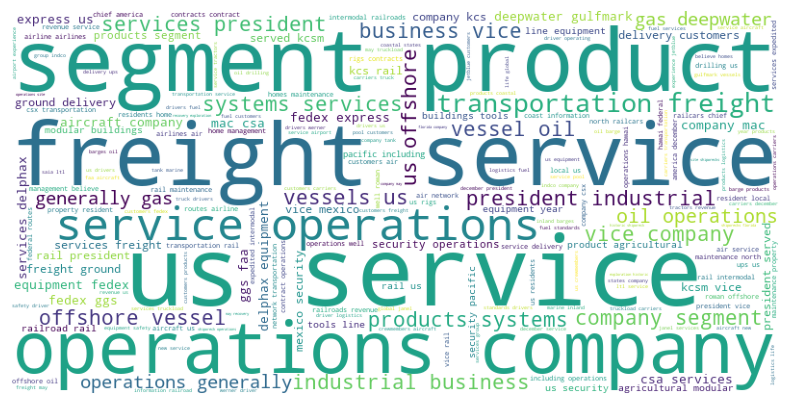

In [39]:
# Wordclouds to visualize all the keywords from word_count
text_word_count = ' '.join(df_new_dataframe['top_keywords_word_count'].tolist())
# lower max_font_size
wordcloud_word_count = WordCloud(width=800, height=400, max_font_size=100, background_color='white').generate(text_word_count) # note that text is a string, not a list
plt.figure(figsize=(10,5))
plt.axis('off')
plt.imshow(wordcloud_word_count)
plt.savefig('keyword_word_count.png') # save as PNG file
plt.show()

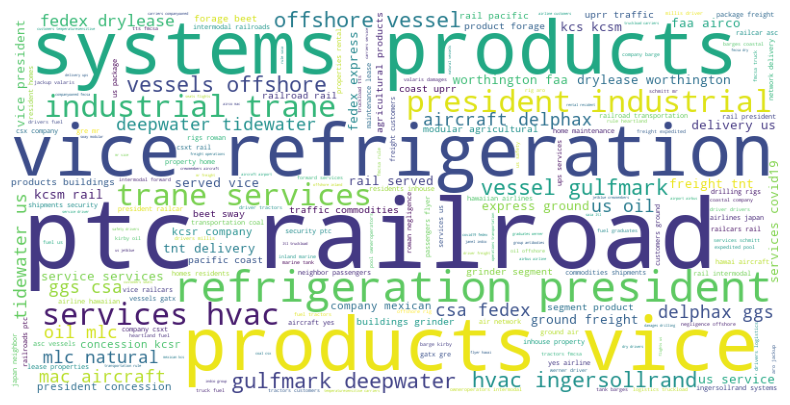

In [41]:
# Wordclouds to visualize all the keywords from word_count
text_tfidf = ' '.join(df_new_dataframe['top_keyword_tfidf'].tolist())
# lower max_font_size
wordcloud_tfidf = WordCloud(width=800, height=400, max_font_size=100, background_color='white').generate(text_tfidf) # note that text is a string, not a list
plt.figure(figsize=(10,5))
plt.axis('off')
plt.imshow(wordcloud_tfidf)
plt.savefig('keyword_tfidf.png') # save as PNG file
plt.show()

#### E: Word embedding

##### E-1: Train a word2vec model with the full 10-K sample. Please use the cleaned text (e.g., results from Step C) for training.

In [43]:
# Use clean text from full 10-K sample for training the model. 
word2vec_docs = [row.split() for row in df_2020_10K_item1_full['clean_text']]
# training word2vec model using the list of words
model = Word2Vec(word2vec_docs, min_count=5, vector_size=50, workers=8, window=5, sg = 1)

In [45]:
# save the model for future use; you don't need to train Word2Vec for multiple times
model.save("word2vec.model")
# load model from stored file
model = Word2Vec.load("word2vec.model")

##### E-2: Manually inspect the wordclouds, choose three representative keywords that are relevant to the industry sector of your interest. Utilize the trained word2vec model to find the most relevant five words for each of these three keywords

In [47]:
# Reference: I write the loop below and let chatGPT to optimize the output format. 
# for keyword in keywords:
#     similar_words = model.wv.most_similar(keyword, topn = 5)
# ChatGPT also suggest me to add try except for just in case the keyword is not found in the model
keywords = ['freight', 'railroad', 'operations']
for keyword in keywords:
    try:
        # Reference: https://tedboy.github.io/nlps/generated/generated/gensim.models.Word2Vec.most_similar.html
        similar_words = model.wv.most_similar(keyword, topn = 5)
        print(f"Keyword: {keyword}")
        for word, similarity in similar_words:
            print(f"  {word}: {similarity:.4f}")
    except KeyError:
        print(f"Keyword '{keyword}' not found in the vocabulary.")

Keyword: freight
  ltl: 0.8954
  intermodal: 0.8898
  truckload: 0.8780
  shipping: 0.8342
  linehaul: 0.8246
Keyword: railroad
  rail: 0.8500
  railway: 0.8417
  highway: 0.7899
  truck: 0.7724
  pacifico: 0.7720
Keyword: operations
  business: 0.7990
  operating: 0.7970
  •difficulties: 0.7220
  operation: 0.7191
  ameco: 0.7064


### Part 3: Comprehensive Analysis of One Sample Firm

### F. Firm Analysis and Strategy Suggestion

##### F-1: Convert the keywords extracted in D.2 into word embeddings with the word2vec model trained in E.1. Add up the embeddings for each firm to create the firm-level embeddings. Use the firm-level embeddings to find the focal firm’s competing firms (or most similar firms). 

In [51]:
from DocumentSimilarity import DocumentSimilarity
docsim = DocumentSimilarity(model = Word2Vec.load("word2vec.model"), gvkeys=df_new_dataframe['gvkey'], conm = df_new_dataframe['conm'], 
                       keywordslist = df_new_dataframe['top_keyword_tfidf'])

docsim.get_firm_embedding(firm = 4598)
docsim.most_similar(firm = 4598, topn = 10)


[]


##### F-2: Compare the revenue, market share, and ROA of the focal firm to its competitors and provide suggestions accordingly.

##### F-3: Perform an analysis of the historical stock prices, ROA, revenue, and assets of the chosen firm. Investigate potential correlations and address noteworthy decreases and increases.